# Analysing Results

In [1]:
import gzip
import os

from pprint import pprint

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deephyper.analysis import rank
from deephyper.analysis._matplotlib import figure_size, update_matplotlib_rc

from lcdb.analysis import read_csv_results
from lcdb.analysis import hyperparameters_from_row
from lcdb.analysis.plot import plot_learning_curves

# Pre-made queries from LCDB
from lcdb.analysis.json import JsonQuery
from lcdb.analysis.json import QueryAnchorValues
from lcdb.analysis.json import QueryMetricValuesFromAnchors
from lcdb.analysis.json import QueryAnchorKeys
from lcdb.analysis.score import accuracy_from_confusion_matrix
from lcdb.analysis.score import balanced_accuracy_from_confusion_matrix

update_matplotlib_rc()
figsize = figure_size(252 * 1.8, 1.0)

In [2]:
source_csv = "output/lcdb.workflow.sklearn.LibLinearWorkflow/38/42-42-42/results.csv.gz"

# Load a dataframe with the results
# The dataframe is sorted by `job_id` (increasing) as parallel jobs scheduled asynchronously 
# may be collected in a different order than when they were submitted.
with gzip.GzipFile(source_csv, "rb") as f:        
    r_df, r_df_failed = read_csv_results(f)
r_df

,p:C,p:class_weight,p:dual,p:fit_intercept,p:intercept_scaling,p:loss,p:max_iter,p:multiclass,p:penalty,p:pp@cat_encoder,...,m:openmlid,m:workflow_seed,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed,m:traceback,m:json
0,1.000000e+00,none,True,True,1.000000,squared_hinge,1000,ovr,l2,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
7,1.188202e-10,none,False,False,174.091017,squared_hinge,507,ovo-scikit,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
1,8.574112e+10,balanced,False,False,142.341708,squared_hinge,5123,ovo-scikit,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
11,1.589657e+01,balanced,False,True,68.309033,squared_hinge,601,ovo-scikit,l1,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
2,2.870839e-05,balanced,True,False,1.167703,squared_hinge,219,ovr,l2,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,4.970072e+08,none,True,True,61.261583,squared_hinge,3290,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
311,2.187792e+09,none,True,True,579.566274,squared_hinge,115,ovo-scikit,l2,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
309,8.813393e+09,none,False,False,46.109745,squared_hinge,2444,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
312,1.458168e+01,none,True,False,4.289682,squared_hinge,361,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."


In [3]:
r_df_failed

,p:C,p:class_weight,p:dual,p:fit_intercept,p:intercept_scaling,p:loss,p:max_iter,p:multiclass,p:penalty,p:pp@cat_encoder,...,m:openmlid,m:workflow_seed,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed,m:traceback,m:json
34,6.306707e+08,none,True,True,1.214539,hinge,476,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
38,1.439568e+07,none,True,True,2.127399,squared_hinge,479,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
54,3.010473e+00,balanced,True,False,2.133003,hinge,2958,ovr,l2,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
59,3.783215e-02,none,False,False,7.246667,squared_hinge,1621,ovr,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
85,5.322463e+10,balanced,True,False,2.953958,hinge,4731,ovr,l2,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
86,1.213680e-11,balanced,True,True,858.497373,squared_hinge,142,ovr,l2,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
92,2.155676e+10,balanced,False,True,13.706250,squared_hinge,6925,ovo-scikit,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
124,3.599033e+06,balanced,False,True,382.635822,squared_hinge,1300,ovr,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
135,1.526841e-10,balanced,False,True,7.296983,squared_hinge,4063,ovo-scikit,l1,onehot,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
140,1.045566e-07,balanced,False,False,22.857495,squared_hinge,264,ovr,l1,ordinal,...,38,42,lcdb.workflow.sklearn.LibLinearWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."


In [4]:
print("Number of successful runs:", len(r_df))
print("Number of failed runs:", len(r_df_failed))

timestamp_start_experiment = min(r_df["m:timestamp_submit"].min(), r_df_failed["m:timestamp_submit"].min())
timestamp_end_experiement = min(r_df["m:timestamp_gather"].max(), r_df_failed["m:timestamp_gather"].max())
duration_experiment = timestamp_end_experiement - timestamp_start_experiment
print(f"Experiment duration: {duration_experiment} seconds")

Number of successful runs: 297
Number of failed runs: 19
Experiment duration: 472.01164078712463 seconds


In [5]:
# Display the error of a failed job
idx = 0
print(r_df_failed.iloc[idx]["m:traceback"])

"Traceback (most recent call last):
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/controller.py", line 235, in fit_workflow_on_current_anchor
    self.workflow.fit(
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/utils.py", line 67, in terminate_on_timeout
    return results.get(timeout)
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/build/dhenv/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/build/dhenv/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/workflow/_base_workflow.py", line 31, in fit
    self._fit(X=X, y=y, metadata=metadata, *args, **kwargs)
  File "/lus/grand/projects/datascience/regele/po

In [9]:
x_list = []
for idx, row in r_df_failed.iterrows():
    if "FeatureAgglomeration" in row["m:traceback"]:
        x = hyperparameters_from_row(row)
        x = {k[3:]: v for k, v in x.items() if k.startswith("pp@")}
        x_list.append(x)
pd.DataFrame(x_list)

,cat_encoder,decomposition,featuregen,featureselector,scaler,kernel_pca_kernel,kernel_pca_n_components,poly_degree,selectp_percentile,std_with_std
0,onehot,agglomerator,none,generic,minmax,linear,0.25,2,25,True
1,onehot,agglomerator,none,generic,minmax,linear,0.25,2,25,True
2,onehot,agglomerator,none,generic,none,linear,0.25,2,25,True
3,ordinal,agglomerator,none,generic,std,linear,0.25,2,25,False
4,onehot,agglomerator,none,generic,none,linear,0.25,2,25,True
5,onehot,agglomerator,none,generic,none,linear,0.25,2,25,True
6,onehot,agglomerator,none,generic,none,linear,0.25,2,25,True
7,ordinal,agglomerator,none,generic,minmax,linear,0.25,2,25,True
8,onehot,agglomerator,none,generic,minmax,linear,0.25,2,25,True
9,ordinal,agglomerator,none,generic,std,linear,0.25,2,25,False


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
X.shape
# transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
transformer = GenericUnivariateSelect()
X_new = transformer.fit_transform(X, y)
X_new.shape

(569, 1)

## Validation Error Rate vs. Number of Samples

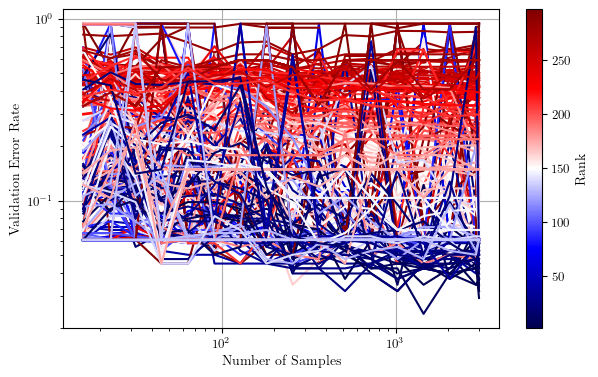

In [14]:
# Plot: Validation Error Rate vs. Number of Samples
source = r_df["m:json"]

query_anchor_values = QueryAnchorValues()
anchor_values = source.apply(query_anchor_values).to_list()

query_confusion_matrix_values = QueryMetricValuesFromAnchors("confusion_matrix", split_name="val")
out = source.apply(query_confusion_matrix_values)
error_rate_values = out.apply(lambda x: list(map(lambda x: 1 - accuracy_from_confusion_matrix(x), x))).to_list()

for i, (xi, yi) in enumerate(zip(anchor_values, error_rate_values)):
    anchor_values[i] = xi[:len(yi)]

fig, ax = plt.subplots(figsize=figsize)
plot_learning_curves(anchor_values, error_rate_values, ax=ax)
ax.set_xlabel(f"Number of Samples")
ax.set_ylabel(f"Validation Error Rate")
ax.set_xscale("log")
ax.set_yscale("log")
plt.savefig(os.path.join(os.path.dirname(source_csv), "val_error_rate_vs_samples.jpg"), dpi=300, bbox_inches="tight")
plt.show()

## Validation Error Rate vs. Time

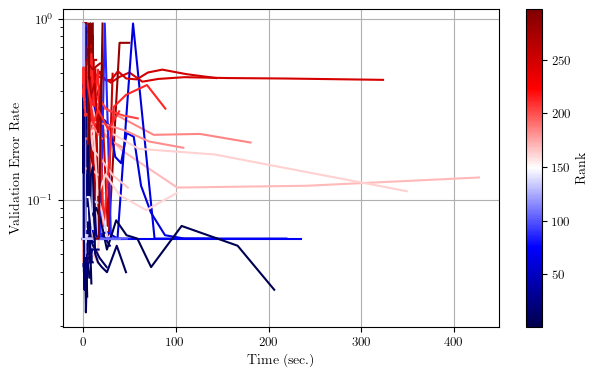

In [15]:
# Plot: Validation Error Rate vs. Time
# TODO: we may need to remove initial overheads to make all times start at 0.
source = r_df["m:json"]

query_anchor_timestamp_stop = QueryAnchorKeys("timestamp_stop")
timestamp_stop_values = source.apply(query_anchor_timestamp_stop).to_list()

query_confusion_matrix_values = QueryMetricValuesFromAnchors("confusion_matrix", split_name="val")
out = source.apply(query_confusion_matrix_values)
error_rate_values = out.apply(lambda x: list(map(lambda x: 1 - accuracy_from_confusion_matrix(x), x))).to_list()

for i, (xi, yi) in enumerate(zip(timestamp_stop_values, error_rate_values)):
    timestamp_stop_values[i] = xi[:len(yi)]

fig, ax = plt.subplots(figsize=figsize)
plot_learning_curves(timestamp_stop_values, error_rate_values, ax=ax)
ax.set_xlabel(f"Time (sec.)")
ax.set_ylabel(f"Validation Error Rate")
# ax.set_xscale("log")
ax.set_yscale("log")
plt.savefig(os.path.join(os.path.dirname(source_csv), "val_error_rate_vs_time.jpg"), dpi=300, bbox_inches="tight")
plt.show()

## Validation Balanced Error Rate vs. Number of Samples

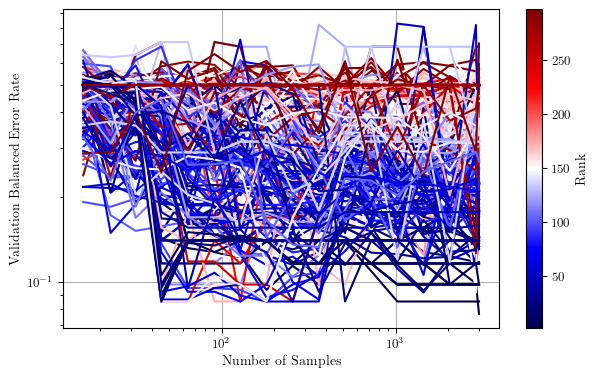

In [16]:
# Plot: Validation Balanced Error Rate vs. Number of Samples
source = r_df["m:json"]

query_anchor_values = QueryAnchorValues()
anchor_values = source.apply(query_anchor_values).to_list()

query_confusion_matrix_values = QueryMetricValuesFromAnchors("confusion_matrix", split_name="val")
out = source.apply(query_confusion_matrix_values)
balanced_error_rate_values = out.apply(lambda x: list(map(lambda x: 1 - balanced_accuracy_from_confusion_matrix(x), x))).to_list()

for i, (xi, yi) in enumerate(zip(anchor_values, balanced_error_rate_values)):
    anchor_values[i] = xi[:len(yi)]

fig, ax = plt.subplots(figsize=figsize)
plot_learning_curves(anchor_values, balanced_error_rate_values, ax=ax)
ax.set_xlabel(f"Number of Samples")
ax.set_ylabel(f"Validation Balanced Error Rate")
ax.set_xscale("log")
ax.set_yscale("log")
plt.savefig(os.path.join(os.path.dirname(source_csv), "val_balanced_error_rate_vs_samples.jpg"), dpi=300, bbox_inches="tight")
plt.show()

## Validation LogLoss vs. Number of Samples

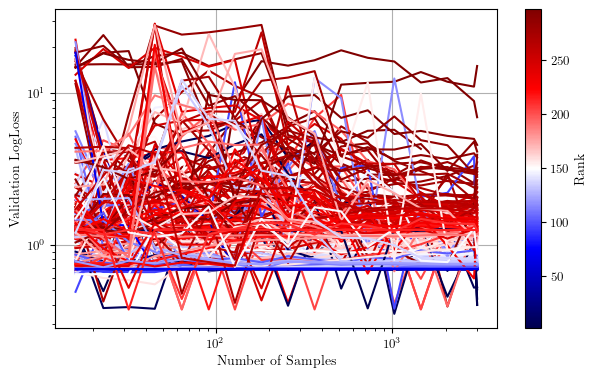

In [17]:
# Plot: Validation LogLoss vs. Time
source = r_df["m:json"]

query_anchor_values = QueryAnchorValues()
anchor_values = source.apply(query_anchor_values).to_list()

query_log_loss_values = QueryMetricValuesFromAnchors("log_loss", split_name="val")
log_loss_values = source.apply(query_log_loss_values).to_list()

for i, (xi, yi) in enumerate(zip(anchor_values, log_loss_values)):
    anchor_values[i] = xi[:len(yi)]

fig, ax = plt.subplots(figsize=figsize)
plot_learning_curves(anchor_values, log_loss_values, alpha=1.0, ax=ax)
ax.set_xlabel(f"Number of Samples")
ax.set_ylabel(f"Validation LogLoss")
ax.set_yscale("log")
ax.set_xscale("log")
plt.savefig(os.path.join(os.path.dirname(source_csv), "val_log_loss_vs_samples.jpg"), dpi=300, bbox_inches="tight")
plt.show()

## Validation Brier Score vs. Number of Samples

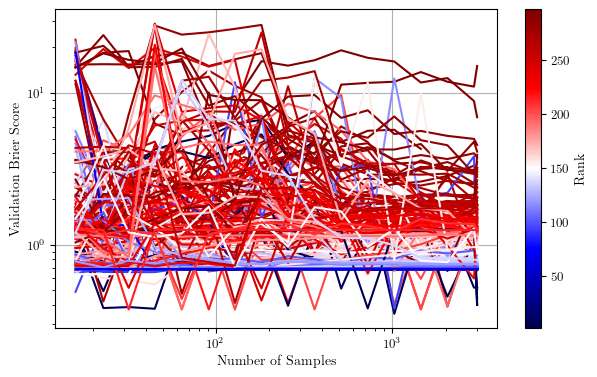

In [19]:
# Plot: Validation Brier Score vs. Time
source = r_df["m:json"]

query_anchor_values = QueryAnchorValues()
anchor_values = source.apply(query_anchor_values).to_list()

query_brier_score_values = QueryMetricValuesFromAnchors("brier_score", split_name="val")
brier_score_values = source.apply(query_brier_score_values).to_list()

for i, (xi, yi) in enumerate(zip(anchor_values, brier_score_values)):
    anchor_values[i] = xi[:len(yi)]

fig, ax = plt.subplots(figsize=figsize)
plot_learning_curves(anchor_values, brier_score_values, alpha=1.0, ax=ax)
ax.set_xlabel(f"Number of Samples")
ax.set_ylabel(f"Validation Brier Score")
ax.set_yscale("log")
ax.set_xscale("log")
plt.savefig(os.path.join(os.path.dirname(source_csv), "val_brier_score_vs_samples.jpg"), dpi=300, bbox_inches="tight")
plt.show()